In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import itertools as it
from glob import glob
from matplotlib import pyplot as plt
from pymea import plotting
from pymea import matlab_compatibility as mc

In [3]:
data_path = '/home/sean/mea data/023/023_170619_1118(001).csv'
#'/Users/kelsey/Dropbox/Lab/maestro_data/023/023_spk_freq_table.csv'
data_table = pd.read_csv(data_path)
time_vector = data_table['time'].map(mc.datetime_str_to_datetime)

In [4]:
condition_cols = {
    'DTX_100nM': 1,
    'DTX_10nM': 2,
    'Ba_0.1mM': 3,
    'PTX_0.5uM': 4,
    'KCl_0.1mM': 5,
    'NaCl_60mM': 6,
    'DMSO': 7,
    'Ctrl': 8
}

def create_well_assignment_filter(cond_name):
    def well_assignment_filter(unit_name):
        col = mc.get_col_number(unit_name)
        return col == condition_cols[cond_name]
    return well_assignment_filter

well_filter_dict = {cond_name: create_well_assignment_filter(cond_name) for cond_name in condition_cols.iterkeys()}


In [5]:
cat_table = plotting.construct_categorized_dataframe(data_table, well_filter_dict)
cat_table['spike_freq'] = cat_table['spike_freq']/300 # convert from spikes/five minutes to spikes/second
cat_table['spike_freq'] = plotting.smooth(cat_table['spike_freq'], kernel_size=20) # smooth using a 20 minute kernel

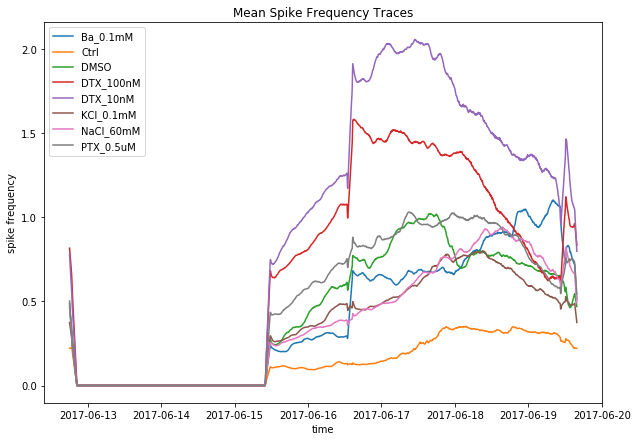

In [32]:
plt.figure(figsize=(10,7))
plotting.plot_mean_frequency_traces(cat_table)

In [6]:
cat_table = cat_table.query('time > "2017-06-15 10:37:05"') #get rid of times before start of baseline recording

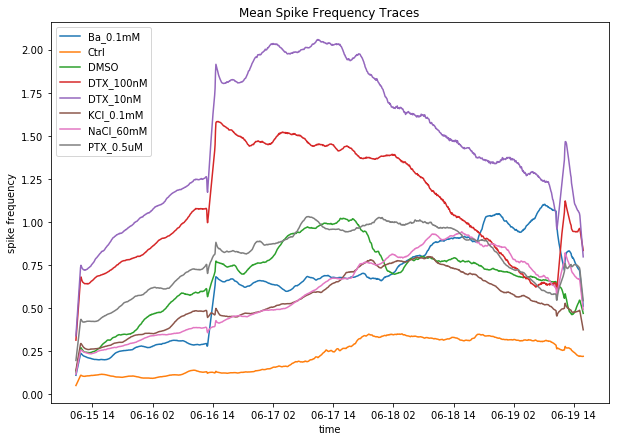

In [34]:
plt.figure(figsize=(10,7))
plotting.plot_mean_frequency_traces(cat_table)

In [7]:
#baseline between 2017-06-15 12:00:05 and 2017-06-16 13:10:05

baseline_table = cat_table.query('time > "2017-06-15 12:00:05"').query('time < "2017-06-16 13:10:05"')
stim_table = cat_table.query('time > "2017-06-16 13:50:05"')


33
151


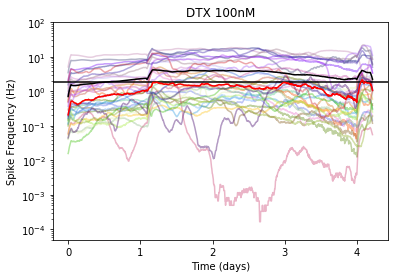

In [64]:
plotting.foldInductionPlusMean(cat_table, baseline_table, stim_table, "DTX_100nM", 'DTX 100nM', var = 100, minHz = .05, maxHz = 100, ymax = 100, plotFolds = False)

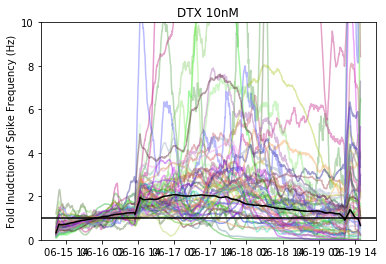

In [87]:
plotting.foldInductionPlusMean(cat_table, baseline_table, stim_table, "DTX_10nM", 'DTX 10nM')

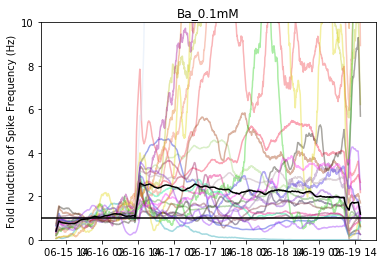

In [79]:
plotting.foldInductionPlusMean(cat_table, baseline_table, stim_table, "Ba_0.1mM", 'Ba_0.1mM', var=2.5) 

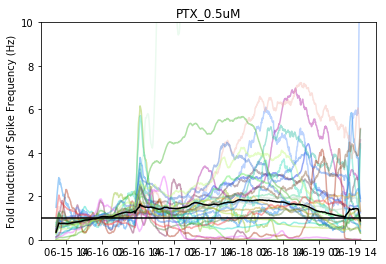

In [80]:
plotting.foldInductionPlusMean(cat_table, baseline_table, stim_table, "PTX_0.5uM", 'PTX_0.5uM', var=2.5)


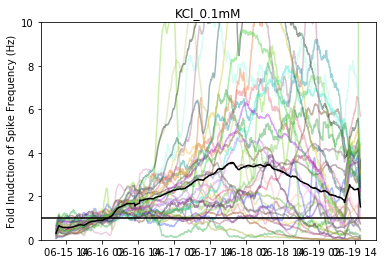

In [81]:
plotting.foldInductionPlusMean(cat_table, baseline_table, stim_table, "KCl_0.1mM", 'KCl_0.1mM')

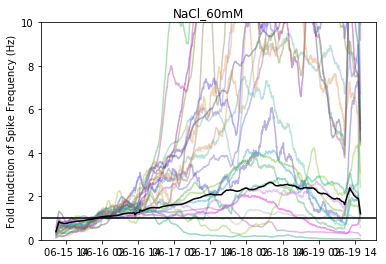

In [82]:
plotting.foldInductionPlusMean(cat_table, baseline_table, stim_table, "NaCl_60mM", 'NaCl_60mM')

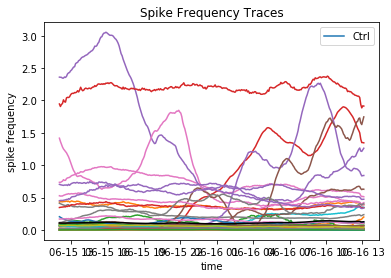

In [22]:
plotting.plot_unit_traces_plus_means(baseline_table.query('condition == "Ctrl"'))

pymea/plotting.py:508: RuntimeWarning: invalid value encountered in double_scalars
  median_freq_traces = c_filter.groupby(('condition', 'time'))['spike_freq'].median()


6
99


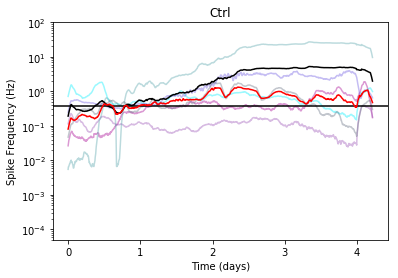

In [62]:
plotting.foldInductionPlusMean(cat_table, baseline_table, stim_table, "Ctrl", 'Ctrl', ind_filter = False, var = 100, minHz = .05, maxHz = 100, ymax=100, plotFolds=False)

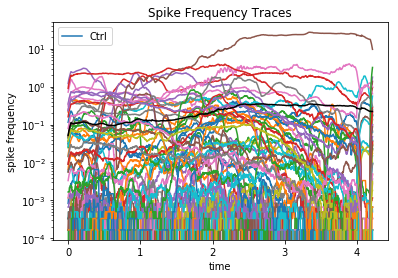

In [53]:
plotting.plot_unit_traces_plus_means(cat_table.query('condition == "Ctrl"'), yscale = 'log')

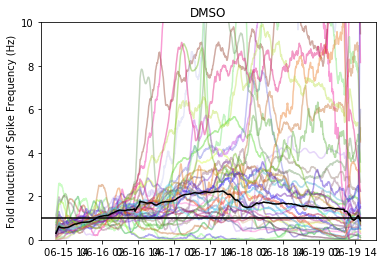

In [84]:
plotting.foldInductionPlusMean(cat_table, baseline_table, stim_table, "DMSO", 'DMSO', ind_filter = False)